In [3]:
'''Importing libraries.'''

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew 
from scipy.stats import kurtosis
sns.set(color_codes=True)

In [5]:
'''Reading Dataset'''

data = pd.read_csv("NFLX.csv")
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
'''Information about the dataset'''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [7]:
'''Exploring first 10 rows of the dataset.'''

data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-01,353.859985,365.390015,349.910004,361.989990,361.989990,8005200
1,2023-02-02,365.160004,368.320007,358.429993,366.890015,366.890015,7857000
2,2023-02-03,359.079987,379.429993,359.000000,365.899994,365.899994,9402000
3,2023-02-06,363.640015,368.450012,360.679993,361.480011,361.480011,4994900
4,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
5,2023-02-08,360.019989,368.190002,358.309998,366.829987,366.829987,6253200
6,2023-02-09,372.410004,373.829987,361.739990,362.500000,362.500000,6901100
7,2023-02-10,359.160004,362.140015,347.140015,347.359985,347.359985,7291100
8,2023-02-13,349.500000,359.700012,344.250000,358.570007,358.570007,7134400
9,2023-02-14,357.549988,363.750000,353.399994,359.959991,359.959991,4624800


In [8]:
'''Taking last 30 rows.'''

data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
241,2024-01-18,480.029999,485.769989,478.019989,485.309998,485.309998,4054400
242,2024-01-19,484.980011,485.670013,476.059998,482.950012,482.950012,5665600
243,2024-01-22,487.549988,489.799988,479.899994,485.709991,485.709991,5212300
244,2024-01-23,492.000000,498.959991,481.399994,492.190002,492.190002,15506000
245,2024-01-24,537.750000,562.500000,537.070007,544.869995,544.869995,26432800
246,2024-01-25,551.950012,563.460022,548.460022,562.000000,562.000000,9451900
247,2024-01-26,561.809998,579.640015,558.429993,570.419983,570.419983,12754500
248,2024-01-29,571.349976,578.549988,562.679993,575.789978,575.789978,6905400
249,2024-01-30,567.320007,570.880005,560.820007,562.849976,562.849976,6181800
250,2024-01-31,562.849976,572.150024,562.039978,564.109985,564.109985,4857600


In [9]:
#it provides list of columns in dataset
list(enumerate( data))

[(0, 'Date'),
 (1, 'Open'),
 (2, 'High'),
 (3, 'Low'),
 (4, 'Close'),
 (5, 'Adj Close'),
 (6, 'Volume')]

In [42]:
'''min method gives the minimum values for each column.'''

data.min()

Date         2023-02-01 00:00:00
Open                  287.339996
High                  297.450012
Low                   285.329987
Close                  292.76001
Adj Close              292.76001
Volume                   1404700
dtype: object

In [47]:
'''Max method gives the max values for each column.'''

data.max()

Date         2024-01-31 00:00:00
Open                  571.349976
High                  579.640015
Low                   562.679993
Close                 575.789978
Adj Close             575.789978
Volume                  28074400
dtype: object

In [44]:
'''mean method gives the mean values for each column.'''

data.mean()

Date         2023-08-01 05:44:13.386454272
Open                            404.181354
High                            409.754742
Low                             398.958446
Close                           404.270478
Adj Close                       404.270478
Volume                      6135307.968127
dtype: object

In [45]:
'''Median method gives the median values for each column.'''

data.median()

Date         2023-08-02 00:00:00
Open                       412.0
High                  418.839996
Low                   407.399994
Close                 411.690002
Adj Close             411.690002
Volume                 5128900.0
dtype: object

In [46]:
'''Std method gives the standard deviation values for each column.'''

data.std()


Date         105 days 06:54:28.300026030
Open                           60.849872
High                           61.318707
Low                            60.722608
Close                          61.193722
Adj Close                      61.193722
Volume                    3814621.397583
dtype: object

In [7]:
'''Describe method give the whole statistics description '''

data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2023-08-01 05:44:13.386454272,404.181354,409.754742,398.958446,404.270478,404.270478,6.135308e+06
min,2023-02-01 00:00:00,287.339996,297.450012,285.329987,292.760010,292.760010,1.404700e+06
25%,2023-05-02 12:00:00,348.994995,356.860001,344.490005,348.119995,348.119995,3.966000e+06
50%,2023-08-02 00:00:00,412.000000,418.839996,407.399994,411.690002,411.690002,5.128900e+06
75%,2023-10-30 12:00:00,444.729996,448.574997,439.175003,444.944992,444.944992,6.880600e+06
max,2024-01-31 00:00:00,571.349976,579.640015,562.679993,575.789978,575.789978,2.807440e+07
std,NaN,60.849872,61.318707,60.722608,61.193722,61.193722,3.814621e+06


In [8]:
#Corelation of the data columns.
data.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.830937,0.825322,0.831771,0.825476,0.825476,-0.142058
Open,0.830937,1.000000,0.996777,0.997574,0.993954,0.993954,-0.066355
High,0.825322,0.996777,1.000000,0.997285,0.997328,0.997328,-0.038919
Low,0.831771,0.997574,0.997285,1.000000,0.997691,0.997691,-0.080164
Close,0.825476,0.993954,0.997328,0.997691,1.000000,1.000000,-0.059169
Adj Close,0.825476,0.993954,0.997328,0.997691,1.000000,1.000000,-0.059169
Volume,-0.142058,-0.066355,-0.038919,-0.080164,-0.059169,-0.059169,1.000000


In [9]:

skewness =skew(data[['Open','High','Low','Close']], axis=0, bias=True)
skewness

array([0.13635769, 0.16342737, 0.14583825, 0.16274577])

In [10]:

kurto= kurtosis(data[['Open','High','Low','Close']], axis=0, bias=True)
kurto

array([-0.59146197, -0.49037444, -0.56402656, -0.52743925])

In [11]:
'''printing the transpose of the data'''
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
Date,2023-02-01 00:00:00,2023-02-02 00:00:00,2023-02-03 00:00:00,2023-02-06 00:00:00,2023-02-07 00:00:00,2023-02-08 00:00:00,2023-02-09 00:00:00,2023-02-10 00:00:00,2023-02-13 00:00:00,2023-02-14 00:00:00,...,2024-01-18 00:00:00,2024-01-19 00:00:00,2024-01-22 00:00:00,2024-01-23 00:00:00,2024-01-24 00:00:00,2024-01-25 00:00:00,2024-01-26 00:00:00,2024-01-29 00:00:00,2024-01-30 00:00:00,2024-01-31 00:00:00
Open,353.859985,365.160004,359.079987,363.640015,358.51001,360.019989,372.410004,359.160004,349.5,357.549988,...,480.029999,484.980011,487.549988,492.0,537.75,551.950012,561.809998,571.349976,567.320007,562.849976
High,365.390015,368.320007,379.429993,368.450012,364.179993,368.190002,373.829987,362.140015,359.700012,363.75,...,485.769989,485.670013,489.799988,498.959991,562.5,563.460022,579.640015,578.549988,570.880005,572.150024
Low,349.910004,358.429993,359.0,360.679993,354.179993,358.309998,361.73999,347.140015,344.25,353.399994,...,478.019989,476.059998,479.899994,481.399994,537.070007,548.460022,558.429993,562.679993,560.820007,562.039978
Close,361.98999,366.890015,365.899994,361.480011,362.950012,366.829987,362.5,347.359985,358.570007,359.959991,...,485.309998,482.950012,485.709991,492.190002,544.869995,562.0,570.419983,575.789978,562.849976,564.109985
Adj Close,361.98999,366.890015,365.899994,361.480011,362.950012,366.829987,362.5,347.359985,358.570007,359.959991,...,485.309998,482.950012,485.709991,492.190002,544.869995,562.0,570.419983,575.789978,562.849976,564.109985
Volume,8005200,7857000,9402000,4994900,6289400,6253200,6901100,7291100,7134400,4624800,...,4054400,5665600,5212300,15506000,26432800,9451900,12754500,6905400,6181800,4857600


In [12]:
'''Listing cloumns which contais null values.'''
data.columns[np.sum(data.isnull()) != 0]

Index([], dtype='object')

In [13]:
'''checking for numm data count.'''
data[data.columns].isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
'''It gives the total number of duplicates in the dataset.'''
data.duplicated().count()

251

In [15]:
'''It gives the total number of rows in the dataset.'''
len(data.axes[0])


251

In [70]:
'''Printing Dataset'''
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-01,353.859985,365.390015,349.910004,361.989990,361.989990,8005200
1,2023-02-02,365.160004,368.320007,358.429993,366.890015,366.890015,7857000
2,2023-02-03,359.079987,379.429993,359.000000,365.899994,365.899994,9402000
3,2023-02-06,363.640015,368.450012,360.679993,361.480011,361.480011,4994900
4,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
...,...,...,...,...,...,...,...
246,2024-01-25,551.950012,563.460022,548.460022,562.000000,562.000000,9451900
247,2024-01-26,561.809998,579.640015,558.429993,570.419983,570.419983,12754500
248,2024-01-29,571.349976,578.549988,562.679993,575.789978,575.789978,6905400
249,2024-01-30,567.320007,570.880005,560.820007,562.849976,562.849976,6181800


In [13]:
"""Line graph between date and Hig, Low stock price"""

#using a function to call variables for line plot
def line_graph():
    '''Line graph for netflix stock high and low price'''
    fig, ax = plt.subplots(figsize=[8,5])
    ax.plot(data.Date,data.High,color='g')
    ax.plot(data.Date,data.Low,color='r')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    font1 = {'family':'serif','color':'black','size':12}
    plt.legend(['High','Low'])
    plt.xlabel('Year & Month')
    plt.ylabel('High($)')
    plt.title("Netflix stock price change from 2023 to 2024 ",fontdict = font1)
    plt.savefig('Netflix stock price change over the months.png')

In [14]:
#using a function to call the code inside the function 
def hist():
    
    plt.figure(figsize= [8,13])
    font1 = {'family':'serif','color':'black','size':12}
    plt.subplot(2,1,1)

    sns.histplot(data=data.High,kde=True,bins=12, line_kws={'color':'crimson', 'lw': 2, 'ls': ':'},color = 'g')
    plt.title('Stock High count',fontdict = font1)
    plt.subplot(2,1,2)
    sns.histplot(data=data.Low,kde=True,bins=12, line_kws={'color':'crimson', 'lw': 2, 'ls': ':'},color ='red')
    plt.title('Stock Low count',fontdict = font1)

    plt.savefig('Stock gain and reduction.png')

In [15]:
#using a function to call the code inside the function 
def box_plot():
    
    '''Box plot for the Netflix stock'''
    
    fig,ax = plt.subplots(figsize=[8,6])
    sns.boxplot(data[['High','Low','Open','Close']],showmeans=True,meanline=True)
    ax.yaxis.set_major_formatter('${x:,.0f}')
    font1 = {'family':'serif','color':'black','size':12}
    plt.title('Comparison Between High, Low and Open, Close from 2023 to 2024',fontdict=font1)
    plt.ylabel('Stock Price')
    plt.savefig('Comparison Between High, Low and Open, Close.png')

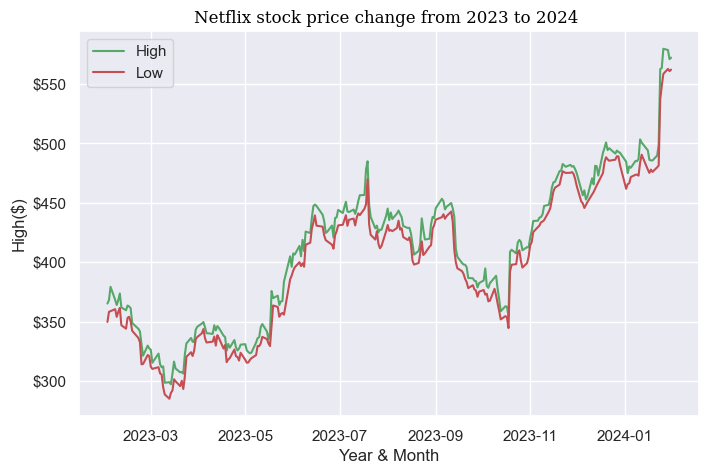

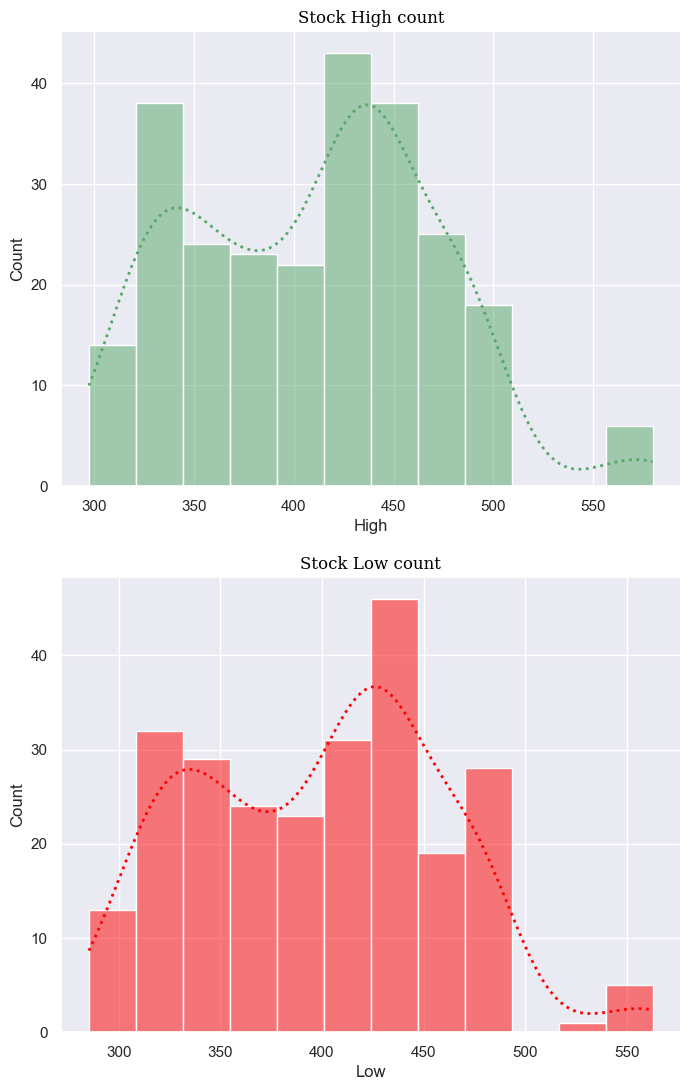

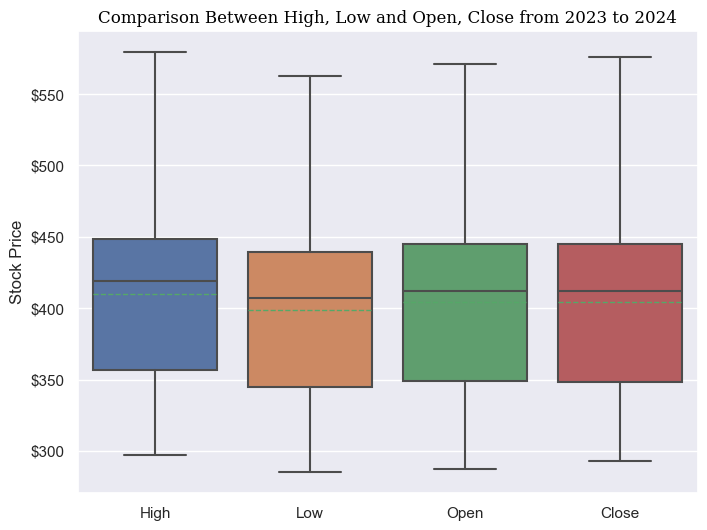

In [16]:
"""Function call"""
line_graph()
hist()
box_plot()